# Task 1 — Data Loading, Cleaning, and Initial Exploratory Analysis

This notebook performs the first step of the Financial News Sentiment & Stock Price Impact Detection project.

### ✔ Objectives of Task 1  
- Load the raw financial news dataset  
- Perform basic cleaning  
- Explore distributions and patterns  
- Generate descriptive statistics  
- Prepare data for later tasks (sentiment analysis + stock correlation)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_colwidth", 300)
sns.set(style="whitegrid")


## 1. Load Raw Dataset

We begin by loading the raw financial news dataset provided in Week 1.  
The dataset contains:
- Headline text  
- Publisher  
- Publication date  
- Other metadata  

We will inspect the top rows and overall structure.


In [2]:
df = pd.read_csv("../newsData/raw_analyst_ratings.csv") 
df.head()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/stocks-that-hit-52-week-highs-on-friday,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/stocks-that-hit-52-week-highs-on-wednesday,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/71-biggest-movers-from-friday,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/46-stocks-moving-in-fridays-mid-day-session,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,"B of A Securities Maintains Neutral on Agilent Technologies, Raises Price Target to $88",https://www.benzinga.com/news/20/05/16095304/b-of-a-securities-maintains-neutral-on-agilent-technologies-raises-price-target-to-88,Vick Meyer,2020-05-22 11:38:59-04:00,A


## 2. Dataset Structure Overview

We now check:
- Column names  
- Data types  
- Missing values  
- Number of records  

This helps validate the quality before cleaning.


In [3]:
df.info()
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


,Unnamed: 0,headline,url,publisher,date,stock
count,1.407328e+06,1407328,1407328,1407328,1407328,1407328
unique,NaN,845770,883429,1034,39957,6204
top,NaN,Benzinga's Top Upgrades,https://www.benzinga.com/news/20/03/15538835/stocks-that-hit-52-week-lows-on-thursday,Paul Quintaro,2020-03-12 00:00:00,MRK
freq,NaN,5449,1704,228373,1766,3333
mean,7.072454e+05,NaN,NaN,NaN,NaN,NaN
std,4.081009e+05,NaN,NaN,NaN,NaN,NaN
min,0.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,3.538128e+05,NaN,NaN,NaN,NaN,NaN
50%,7.072395e+05,NaN,NaN,NaN,NaN,NaN
75%,1.060710e+06,NaN,NaN,NaN,NaN,NaN


## 3. Data Cleaning

We apply initial cleaning required in Task 1:

### ✔ Steps:
- Convert `date` column to datetime
- Drop rows with missing headlines
- Remove duplicate rows
- Compute headline text length

This prepares the dataset for deeper analysis in Task 2–3.


In [4]:
# Convert date
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Remove missing headlines
df = df.dropna(subset=["headline"])

# Remove duplicates
df = df.drop_duplicates()

# Create headline length column
df["headline_length"] = df["headline"].str.len()

df.head()


,Unnamed: 0,headline,url,publisher,date,stock,headline_length
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/stocks-that-hit-52-week-highs-on-friday,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/stocks-that-hit-52-week-highs-on-wednesday,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/71-biggest-movers-from-friday,Lisa Levin,2020-05-26 04:30:07-04:00,A,29
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/46-stocks-moving-in-fridays-mid-day-session,Lisa Levin,2020-05-22 12:45:06-04:00,A,44
4,4,"B of A Securities Maintains Neutral on Agilent Technologies, Raises Price Target to $88",https://www.benzinga.com/news/20/05/16095304/b-of-a-securities-maintains-neutral-on-agilent-technologies-raises-price-target-to-88,Vick Meyer,2020-05-22 11:38:59-04:00,A,87


## 4. Headline Length Statistics

Text length distribution gives early insight into:
- Typical headline size  
- Whether some publishers produce longer articles  
- Outliers or very short/long headlines  

We begin with descriptive statistics.


In [5]:
df["headline_length"].describe()


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

## 5. Visualizing Headline Length Distribution

We plot a histogram to see:
- Distribution shape (normal, skewed)
- Common headline sizes
- Extreme outliers


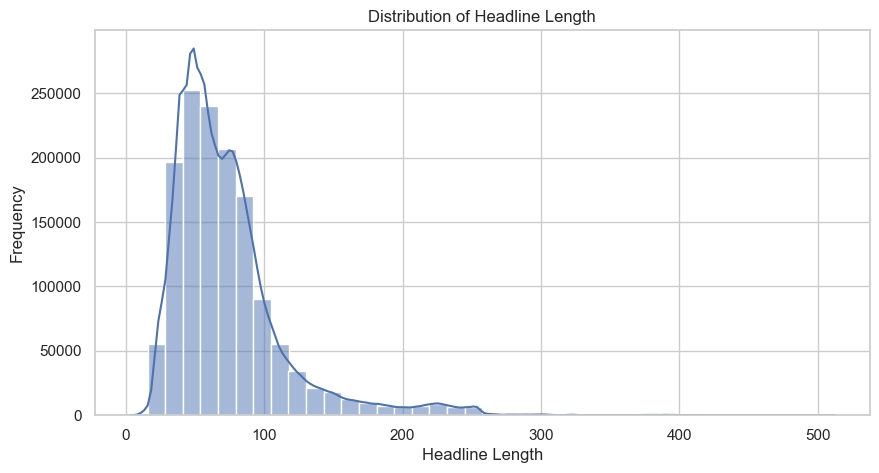

In [6]:
plt.figure(figsize=(10,5))
sns.histplot(df["headline_length"], bins=40, kde=True)
plt.title("Distribution of Headline Length")
plt.xlabel("Headline Length")
plt.ylabel("Frequency")
plt.show()


## 6. Publisher Frequency Analysis

Understanding which publishers contribute the most data helps:
- Identify biases  
- Recognize dominant sources  
- Detect possible duplicate or low-quality sources  

We plot the top 20 publishers.


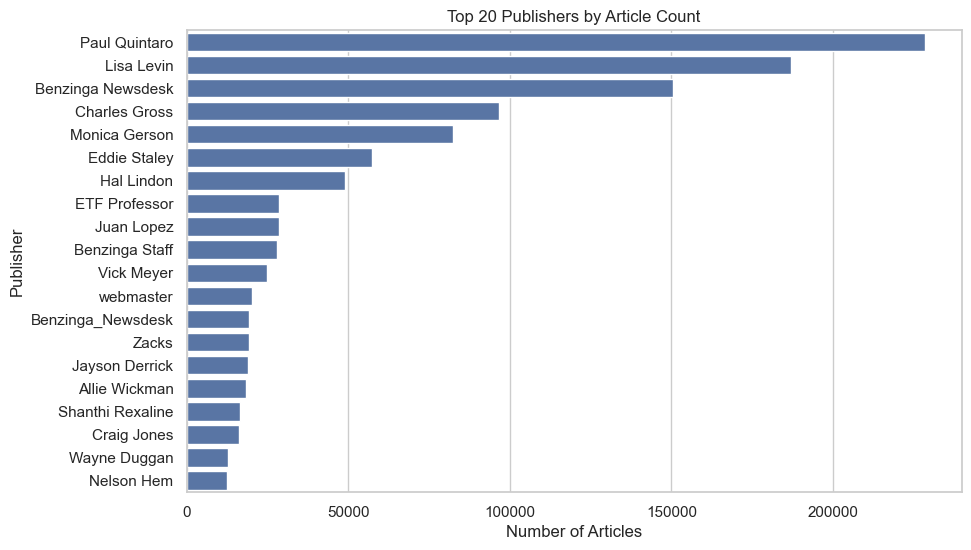

In [7]:
publisher_counts = df["publisher"].value_counts().head(20)

plt.figure(figsize=(10,6))
sns.barplot(x=publisher_counts.values, y=publisher_counts.index)
plt.title("Top 20 Publishers by Article Count")
plt.xlabel("Number of Articles")
plt.ylabel("Publisher")
plt.show()


## 7. Publication Trend (Time Series)

Analyzing publication volume by date helps reveal:
- Seasonal patterns  
- Sudden spikes  
- Missing or inconsistent days  

Useful for aligning with stock price data.


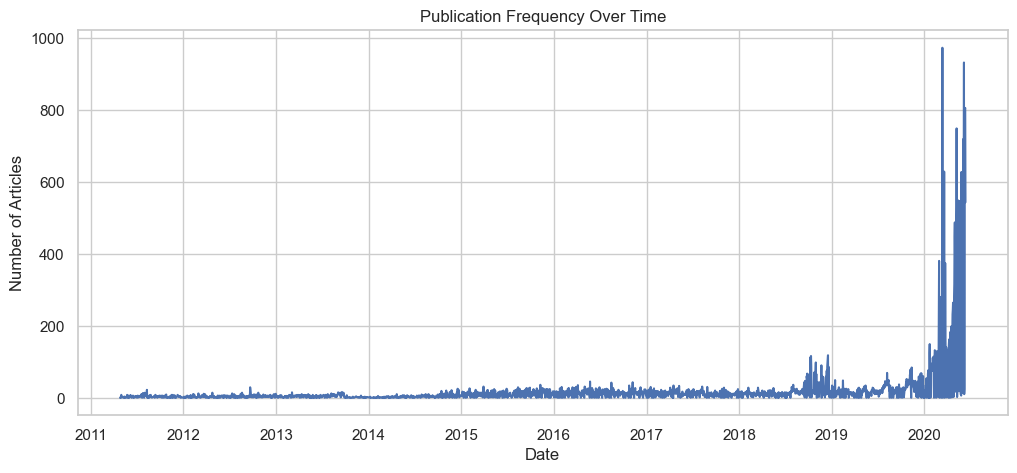

In [8]:
df["date_only"] = df["date"].dt.date
daily_counts = df.groupby("date_only").size()

plt.figure(figsize=(12,5))
daily_counts.plot()
plt.title("Publication Frequency Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.show()


## 8. Basic Keyword Extraction

Before performing full NLP sentiment analysis,  
we look at the **most frequent words** using a simple count vectorizer.

This helps:
- Understand common themes  
- Identify financial vocabulary  
- Spot noisy or irrelevant terms


In [9]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words="english", max_features=20)
word_matrix = vectorizer.fit_transform(df["headline"])

keywords = vectorizer.get_feature_names_out()
keywords


array(['announces', 'benzinga', 'buy', 'downgrades', 'earnings', 'eps',
       'est', 'market', 'mid', 'price', 'pt', 'raises', 'reports',
       'sales', 'shares', 'stocks', 'trading', 'update', 'vs', 'week'],
      dtype=object)

## 9. Save Cleaned Dataset for Task 2

We export the cleaned dataset for use in:
- Sentiment modeling  
- Stock relationship analysis  
- ML features generation  


In [13]:
from pathlib import Path

output_path = "../newsData/news_cleaned.csv"
# ensure target directory exists
Path(output_path).parent.mkdir(parents=True, exist_ok=True)

df.to_csv(output_path, index=False)

output_path


'../newsData/news_cleaned.csv'